In [1]:
# load dataset
import numpy as np
from numpy import dstack
from numpy import array
from numpy import vstack
from pandas import read_csv
from pandas import DataFrame
from numpy import unique
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

In [2]:
X_train = load_file('D:/desktop/HAR/UCI HAR Dataset/train/X_train.txt')
y_train = load_file('D:/desktop/HAR/UCI HAR Dataset/train/y_train.txt')
X_test = load_file('D:/desktop/HAR/UCI HAR Dataset/test/X_test.txt')
y_test = load_file('D:/desktop/HAR/UCI HAR Dataset/test/y_test.txt')

In [3]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train, X_test)
Xtrain=scaler.transform(X_train)
Xtest=scaler.transform(X_test)
print(X_train)
print(Xtrain)

[[ 0.28858451 -0.02029417 -0.13290514 ... -0.84124676  0.17994061
  -0.05862692]
 [ 0.27841883 -0.01641057 -0.12352019 ... -0.8447876   0.18028889
  -0.05431672]
 [ 0.27965306 -0.01946716 -0.11346169 ... -0.84893347  0.18063731
  -0.04911782]
 ...
 [ 0.27338737 -0.01701062 -0.04502183 ... -0.77913261  0.24914484
   0.04081119]
 [ 0.28965416 -0.01884304 -0.15828059 ... -0.78518142  0.24643223
   0.02533948]
 [ 0.35150347 -0.01242312 -0.20386717 ... -0.78326693  0.24680852
   0.03669484]]
[[ 0.20064157 -0.0636826  -0.41962845 ... -0.68721921  0.40794614
  -0.00756789]
 [ 0.05594788  0.03148567 -0.25390836 ... -0.694138    0.40911698
   0.00787517]
 [ 0.07351535 -0.04341648 -0.07629468 ... -0.702239    0.4102883
   0.02650234]
 ...
 [-0.01566765  0.0167814   1.13222107 ... -0.56584847  0.64059683
   0.34870928]
 [ 0.21586648 -0.02812252 -0.86770988 ... -0.57766781  0.63147758
   0.29327564]
 [ 1.09620157  0.12919873 -1.67268082 ... -0.57392691  0.63274259
   0.33396081]]


In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
target_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [13]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xtrain, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best: 0.986398 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.981955 (0.003140) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.979552 (0.005273) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.982771 (0.002861) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.983633 (0.002969) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.981819 (0.003839) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.985174 (0.002726) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.985628 (0.002780) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.985673 (0.002997) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.986398 (0.002459) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.983904 (0.002985) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983995 (0.003254) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.982046 (0.003189) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.976015 (0.004654) wit

In [8]:
modelLR = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
modelLR.fit(Xtrain, y_train)
y_pred_LR = modelLR.fit(Xtrain, y_train).predict(Xtest)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
model = DecisionTreeClassifier()
max_depth = [1,2,3,4,5]
min_samples_split = [1,2,3,4,5]
# define grid search
grid = dict(max_depth=max_depth,min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xtrain, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.904835 using {'max_depth': 5, 'min_samples_split': 4}
0.000000 (0.000000) with: {'max_depth': 1, 'min_samples_split': 1}
0.378173 (0.001248) with: {'max_depth': 1, 'min_samples_split': 2}
0.378264 (0.001033) with: {'max_depth': 1, 'min_samples_split': 3}
0.378219 (0.001119) with: {'max_depth': 1, 'min_samples_split': 4}
0.378128 (0.001318) with: {'max_depth': 1, 'min_samples_split': 5}
0.000000 (0.000000) with: {'max_depth': 2, 'min_samples_split': 1}
0.544885 (0.001151) with: {'max_depth': 2, 'min_samples_split': 2}
0.544840 (0.001178) with: {'max_depth': 2, 'min_samples_split': 3}
0.544840 (0.001125) with: {'max_depth': 2, 'min_samples_split': 4}
0.544659 (0.001397) with: {'max_depth': 2, 'min_samples_split': 5}
0.000000 (0.000000) with: {'max_depth': 3, 'min_samples_split': 1}
0.786862 (0.008211) with: {'max_depth': 3, 'min_samples_split': 2}
0.786772 (0.008064) with: {'max_depth': 3, 'min_samples_split': 3}
0.786726 (0.008161) with: {'max_depth': 3, 'min_samples_split': 4}


In [9]:
from sklearn.model_selection import RandomizedSearchCV
#parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split= 4)
#dt_classifier_rs = RandomizedSearchCV(dt_classifier,random_state = 42)
dt_classifier.fit(Xtrain, y_train)
y_pred_dt = dt_classifier.predict(Xtest)

In [10]:
dt_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_dt)
print("Accuracy using Decision tree:", dt_accuracy)

Accuracy using Decision tree: 0.838140481845945


In [11]:
print("Classification Report for Decision Tree: ")
print()
print(classification_report(y_test,y_pred_dt, target_names=target_names))

Classification Report for Decision Tree: 

                    precision    recall  f1-score   support

           WALKING       0.78      0.95      0.85       496
  WALKING_UPSTAIRS       0.76      0.80      0.78       471
WALKING_DOWNSTAIRS       0.94      0.63      0.76       420
           SITTING       0.78      0.81      0.80       491
          STANDING       0.82      0.79      0.80       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.84      2947
         macro avg       0.85      0.83      0.83      2947
      weighted avg       0.85      0.84      0.84      2947



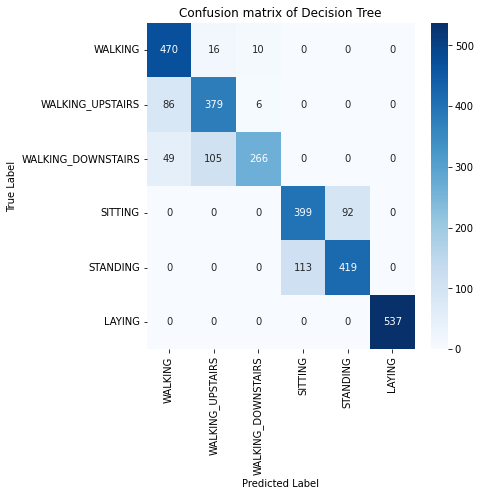

In [12]:
cm_dt= confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,6))
ax=sns.heatmap(cm_dt, xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion matrix of Decision Tree")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [13]:
accuracy_logistic = accuracy_score(y_true = y_test, y_pred = y_pred_LR)
print("Accuracy using Logistic Regression : ", accuracy_logistic)

Accuracy using Logistic Regression :  0.9613165931455717


In [14]:
print("Classification Report for Logistic regression : ")
print()
print(classification_report(y_test, y_pred_LR, target_names=target_names))

Classification Report for Logistic regression : 

                    precision    recall  f1-score   support

           WALKING       0.96      1.00      0.98       496
  WALKING_UPSTAIRS       0.99      0.96      0.97       471
WALKING_DOWNSTAIRS       1.00      0.99      0.99       420
           SITTING       0.96      0.87      0.92       491
          STANDING       0.88      0.97      0.92       532
            LAYING       1.00      0.98      0.99       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



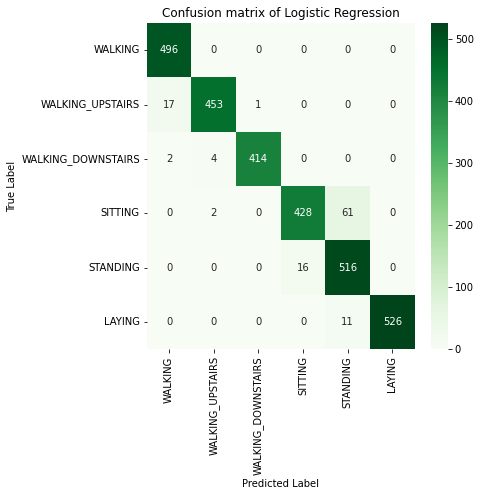

In [15]:
cm_lr= confusion_matrix(y_test,y_pred_LR)
plt.figure(figsize=(6,6))
ax=sns.heatmap(cm_lr, xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g', cmap='Greens')
plt.title("Confusion matrix of Logistic Regression")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [43]:
model = SVC()
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
c = [0.1, 1, 10, 100, 0.001]
# define grid search
grid = dict(C=c,kernel=kernel)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result=grid_search.fit(Xtrain, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best: 0.988030 using {'C': 100, 'kernel': 'rbf'}


In [15]:
svc_model=SVC(C= 100, kernel='rbf')
svc_model.fit(Xtrain, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=100)

In [16]:
y_pred_svc=svc_model.predict(Xtest)

In [17]:
accuracy_svc=accuracy_score(y_true= y_test, y_pred= y_pred_svc)
print("Accuracy using SVM : ", accuracy_svc)

Accuracy using SVM :  0.9572446555819477


In [18]:
print("Classification Report for SVM : ")
print()
print(classification_report(y_test, y_pred_svc, target_names=target_names))

Classification Report for SVM : 

                    precision    recall  f1-score   support

           WALKING       0.95      0.97      0.96       496
  WALKING_UPSTAIRS       0.93      0.96      0.95       471
WALKING_DOWNSTAIRS       0.97      0.92      0.94       420
           SITTING       0.97      0.91      0.94       491
          STANDING       0.92      0.97      0.95       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



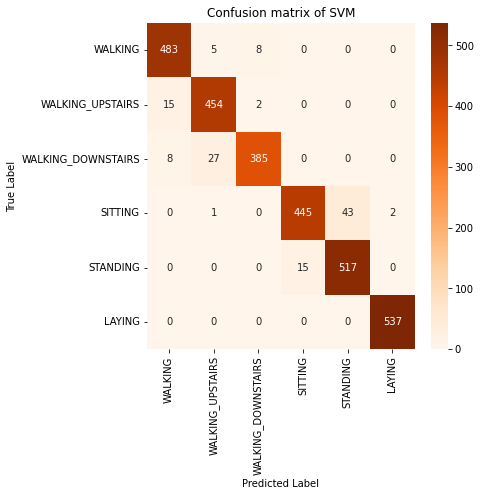

In [19]:
cm_svc= confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(6,6))
ax=sns.heatmap(cm_svc, xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g', cmap='Oranges')
plt.title("Confusion matrix of SVM")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [52]:

model = RandomForestClassifier()
max_features = ['sqrt', 'log2', 'auto']
n_estimators =[10,100,1000]
# define grid search
grid = dict(max_features=max_features,n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xtrain, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best: 0.982862 using {'max_features': 'log2', 'n_estimators': 1000}


In [24]:
clf= RandomForestClassifier(max_features='log2',n_estimators= 1000)
clf.fit(Xtrain, y_train)

C:\Users\HP\AppData\Local\Temp/ipykernel_14348/2224439910.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(Xtrain, y_train)


RandomForestClassifier(max_features='log2', n_estimators=1000)

In [25]:
y_pred_clf=clf.predict(Xtest)
clf_accuracy=accuracy_score(y_true= y_test, y_pred= y_pred_clf)
print("Accuracy using Random Forest Classifier : ", clf_accuracy)

Accuracy using Random Forest Classifier :  0.9409569053274517


In [26]:
print("Classification Report for CLF : ")
print()
print(classification_report(y_test, y_pred_clf, target_names=target_names))

Classification Report for CLF : 

                    precision    recall  f1-score   support

           WALKING       0.91      0.98      0.94       496
  WALKING_UPSTAIRS       0.90      0.94      0.92       471
WALKING_DOWNSTAIRS       0.95      0.84      0.89       420
           SITTING       0.97      0.90      0.93       491
          STANDING       0.91      0.97      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



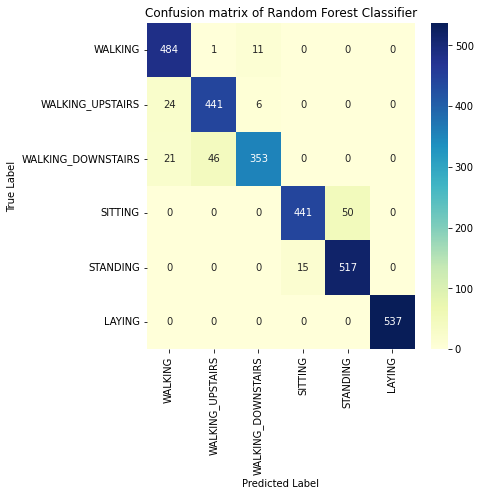

In [27]:
cm_clf= confusion_matrix(y_test,y_pred_clf)
plt.figure(figsize=(6,6))
ax=sns.heatmap(cm_clf, xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Confusion matrix of Random Forest Classifier")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [29]:
model = KNeighborsClassifier()
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
metric = ['euclidean','manhattan','minkowski']
weights = ['uniform','distance']
# define grid search
grid = dict(n_neighbors=n_neighbors,metric=metric,weights=weights)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xtrain, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.985401 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [5]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 1, weights='uniform')
knn.fit(Xtrain, y_train)
y_pred_knn=knn.predict(Xtest)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [6]:
knn_accuracy=accuracy_score(y_true= y_test, y_pred= y_pred_knn)
print("Accuracy using KNN model : ", knn_accuracy)

Accuracy using KNN model :  0.8737699355276553


In [7]:
print("Classification Report for KNN model : ")
print()
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Classification Report for KNN model : 

                    precision    recall  f1-score   support

           WALKING       0.83      0.97      0.89       496
  WALKING_UPSTAIRS       0.86      0.88      0.87       471
WALKING_DOWNSTAIRS       0.95      0.73      0.83       420
           SITTING       0.85      0.76      0.80       491
          STANDING       0.80      0.90      0.85       532
            LAYING       0.99      0.97      0.98       537

          accuracy                           0.87      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.87      0.87      2947



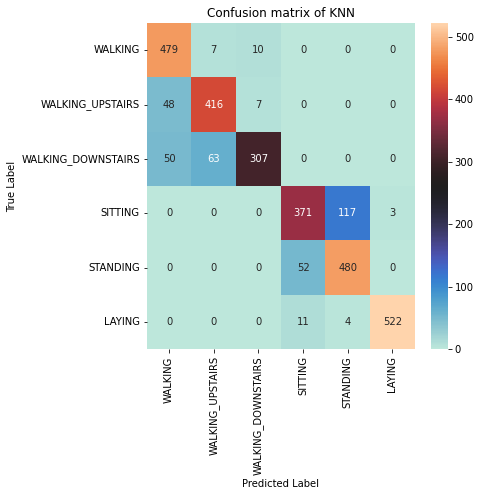

In [8]:
cm_knn= confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize=(6,6))
ax=sns.heatmap(cm_knn, xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g', cmap='icefire')
plt.title("Confusion matrix of KNN")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [30]:
from sklearn.ensemble import StackingClassifier
level0=list()
level0.append(('lr',LogisticRegression(solver='liblinear', penalty='l2', C=1.0)))
level0.append(('dt',DecisionTreeClassifier(max_depth=5, min_samples_split= 4)))
level0.append(('svc',SVC(C= 100, kernel='rbf')))
level0.append(('rfc',RandomForestClassifier(max_features='log2',n_estimators= 1000)))
level0.append(('knn',KNeighborsClassifier(metric='manhattan', n_neighbors= 1, weights='uniform')))
level1=LogisticRegression()
model_en=StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [31]:
model_en.fit(Xtrain, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(solver='liblinear')),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_split=4)),
                               ('svc', SVC(C=100)),
                               ('rfc',
                                RandomForestClassifier(max_features='log2',
                                                       n_estimators=1000)),
                               ('knn',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=1))],
                   final_estimator=LogisticRegression())

In [32]:
y_pred_en=model_en.predict(Xtest)
en_accuracy=accuracy_score(y_true= y_test, y_pred= y_pred_en)
print("Accuracy using Ensemble model : ", en_accuracy)

Accuracy using Ensemble model :  0.9670851713607058


In [33]:
print("Classification Report for Ensmble model : ")
print()
print(classification_report(y_test, y_pred_en, target_names=target_names))

Classification Report for Ensmble model : 

                    precision    recall  f1-score   support

           WALKING       0.94      0.99      0.97       496
  WALKING_UPSTAIRS       0.98      0.94      0.96       471
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
           SITTING       0.97      0.91      0.94       491
          STANDING       0.93      0.98      0.95       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



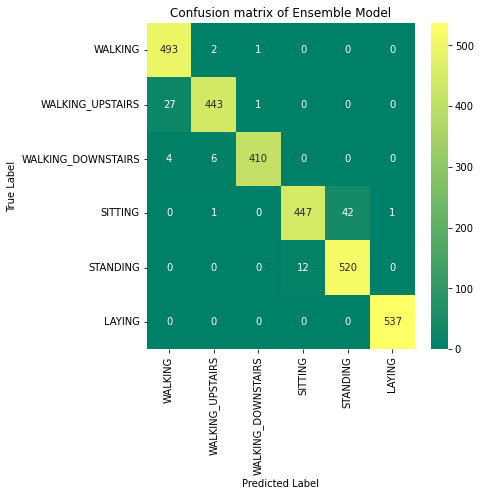

In [34]:
cm_en= confusion_matrix(y_test,y_pred_en)
plt.figure(figsize=(6,6))
ax=sns.heatmap(cm_en, xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g', cmap='summer')
plt.title("Confusion matrix of Ensemble Model")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [35]:
train = pd.read_csv('C:/Users/HP/train.csv')
test = pd.read_csv('C:/Users/HP/test.csv')
y_trainc = train.Activity
X_trainc = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
y_testc = test.Activity
X_testc = pd.DataFrame(test.drop(['Activity','subject'],axis=1))

In [36]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_trainc, X_testc)
Xtrainc=scaler.transform(X_trainc)
Xtestc=scaler.transform(X_testc)

In [37]:
pca=PCA(n_components=250)
pca1=pca.fit_transform(Xtrainc)
pca1
pca2=pca.fit_transform(Xtestc)
pca2

array([[-10.1092327 ,  -2.2753663 ,  -0.60719497, ...,   0.12317932,
          0.07473382,  -0.02742023],
       [-12.90593848,  -1.69012497,  -3.4627005 , ...,   0.15130222,
         -0.05111429,   0.16165188],
       [-14.23875245,   1.82654245,  -2.48617681, ...,   0.08291401,
         -0.14489326,  -0.20781338],
       ...,
       [ 11.56563431,  -4.09788322,   1.33949011, ...,  -0.07748608,
          0.25653164,   0.3018865 ],
       [  8.05842091,  -5.32478051,   0.44372855, ...,   0.06823328,
          0.14347969,  -0.02625602],
       [  9.02696009,  -5.20350631,   1.13603434, ...,  -0.08840469,
         -0.25456441,  -0.18379926]])

In [38]:
from sklearn.ensemble import StackingClassifier
level0=list()
level0.append(('lr',LogisticRegression(solver='liblinear', penalty='l2', C=1.0)))
level0.append(('dt',DecisionTreeClassifier(max_depth=5, min_samples_split= 4)))
level0.append(('svc',SVC(C= 100, kernel='rbf')))
level0.append(('rfc',RandomForestClassifier(max_features='log2',n_estimators= 1000)))
level0.append(('knn',KNeighborsClassifier(metric='manhattan', n_neighbors= 1, weights='uniform')))
level1=LogisticRegression()
model_en=StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [39]:
model_en.fit(pca1, y_trainc)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(solver='liblinear')),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_split=4)),
                               ('svc', SVC(C=100)),
                               ('rfc',
                                RandomForestClassifier(max_features='log2',
                                                       n_estimators=1000)),
                               ('knn',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=1))],
                   final_estimator=LogisticRegression())

In [40]:
y_pred_en=model_en.predict(pca2)
en_accuracy=accuracy_score(y_true= y_testc, y_pred= y_pred_en)
print("Accuracy using Ensemble model : ", en_accuracy)

Accuracy using Ensemble model :  0.47641669494401084


In [41]:
print("Classification Report for Ensmble model : ")
print()
print(classification_report(y_testc, y_pred_en, target_names=target_names))

Classification Report for Ensmble model : 

                    precision    recall  f1-score   support

           WALKING       0.51      0.50      0.51       537
  WALKING_UPSTAIRS       0.27      0.31      0.29       491
WALKING_DOWNSTAIRS       0.46      0.39      0.43       532
           SITTING       0.58      0.58      0.58       496
          STANDING       0.50      0.60      0.55       420
            LAYING       0.58      0.49      0.53       471

          accuracy                           0.48      2947
         macro avg       0.49      0.48      0.48      2947
      weighted avg       0.48      0.48      0.48      2947



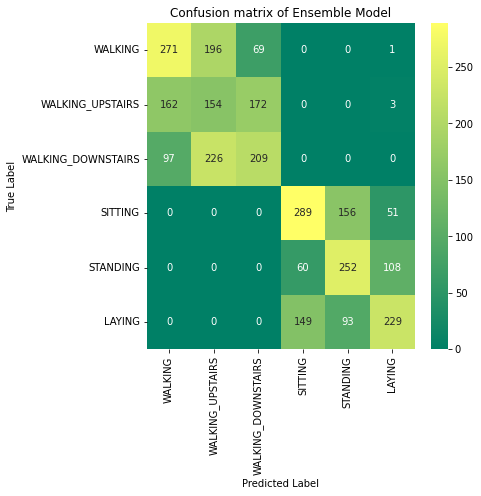

In [42]:
cm_en= confusion_matrix(y_testc,y_pred_en)
plt.figure(figsize=(6,6))
ax=sns.heatmap(cm_en, xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g', cmap='summer')
plt.title("Confusion matrix of Ensemble Model")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()